# Root Finding Algorithms

## 1. Bisection Method
### Algorithm
1. Find an initial interval $[a, b]$ such that $f$ has a sign change in it. 
2. Evaluate $f$ at the midpoint $c = \frac{a+b}{2}$.
3. Consider 3 cases below,
    1. If $f(a) \cdot f(c) < 0$, then let the next interval $[a_{\text{next}}, b_{\text{next}}]=[a, c]$.
    2. If $f(c) \cdot f(b) < 0$, then let the next interval $[a_{\text{next}}, b_{\text{next}}]=[c, b]$.
    3. Otherwise, $f(c) = 0$, then the solution has been found. Return $c$ as a solution. 
4. Use $[a_{\text{next}}, b_{\text{next}}]$ as a new interval and repeat _steps 2, 3_ until some criterions satisfied. (For instance, the number of max iterations is achieved, or the error is below error tolerance, etc.)
5. Return $c=\frac{a_{\text{next}} + b_{\text{next}}}{2}$ as an approximated solution.

### Implementation

In [1]:
import matplotlib.pyplot as plt 
import numpy as np  

In [2]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,  
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'

    num_iterations = 0
    a_next, b_next = a, b

    if report_history:   
        history = {'estimation': [], 'error': []}  

    while True:
        c = (a_next + b_next) / 2
        error = (b_next - a_next) / 2
        if report_history:
            history['estimation'].append(c)  
            history['error'].append(error)

        if error < tolerance:
            print('The approximation has satisfied the tolerance.')
            return (c, history) if report_history else c  

        if num_iterations < max_iterations:
            num_iterations += 1

            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return c, history if report_history else c
        else:
            print('Terminate since reached the maximum iterations.')
            return c, history if report_history else c

### Example

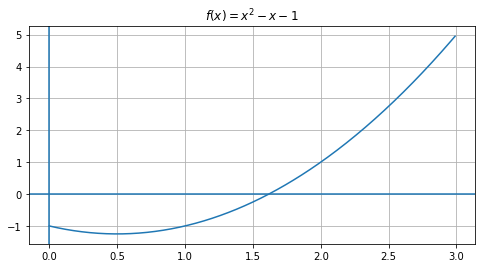

In [3]:
def f(x):     
    return x**2 - x - 1
fig, ax = plt.subplots(figsize=(8, 4))
search_range = np.arange(0, 3, 0.01)
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x) = x^2 - x - 1$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

In [4]:
my_initial_interval = [1, 2]     # Maybe [1.0, 2.0] is a good choice

solution, history = bisection(   
    f, 
    my_initial_interval,
    max_iterations=23,
    tolerance=1e-7,
    report_history=True
)

print(solution)

The approximation has satisfied the tolerance.
1.6180339455604553


### Error Analysis

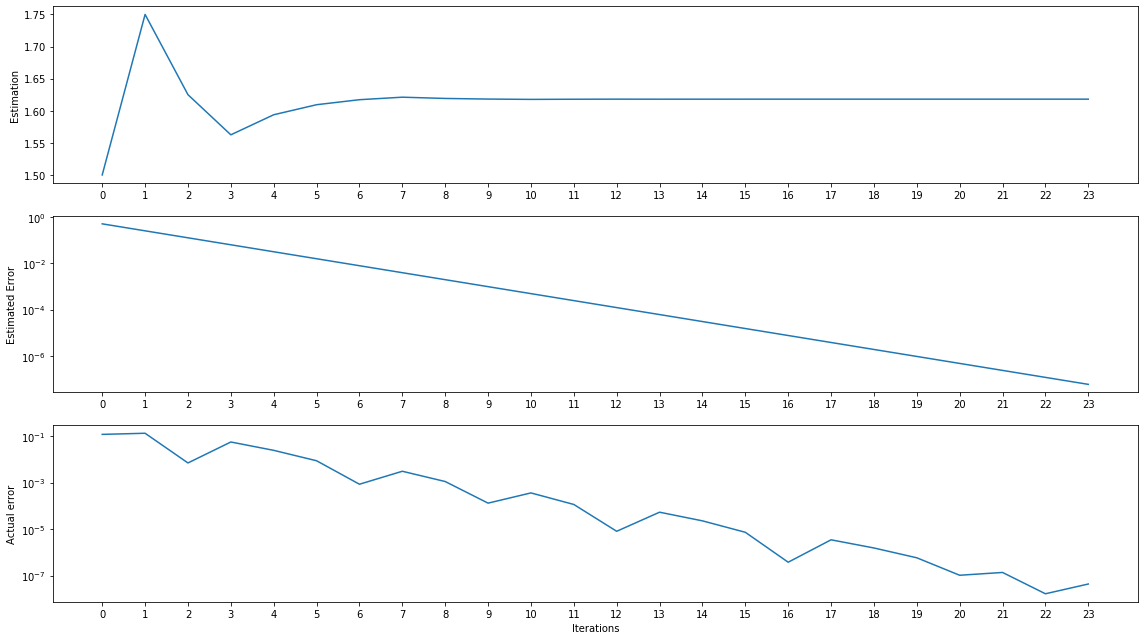

In [5]:
exact_solution = (1 + np.sqrt(5)) / 2
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
ax1, ax2, ax3 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation']) 
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])  
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')    

actual_error = np.abs(history['estimation']-exact_solution)
ax3.plot(iterations, actual_error)
ax3.set_ylabel('Actual error')
ax3.set_yscale('log')   
ax3.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

#converge linearly

## 2. Newton's Method

### Alogrithm

1. Given a guessing solution $x_0$ for $f(x) = 0$ and the values of $f(x_0)$.
2. Find the differential value $f'(x_0)$.
3. Find the next approximation solution $x_1$ by using the formula $x_1 = x_0 - \dfrac{f(x_0)}{f'(x_0)}$. 
4. Repeat the _step 2_ and the _step 3_ to find the following approximations $x_2, x_3, \dots, x_n$ until until some criterions satisfied (For instance, max iterations, error tolerance, etc.).
5. Return the approximation solution $x_n$.

### Implementation

In [6]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    # Set the initial conditions
    x_n = x_0
    num_iterations = 0
    
    if report_history:
        history = {'estimation': [], 'error': []}
    
    while True:
        f_of_x_n = func(x_n)
        error = abs(f_of_x_n)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)

        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
        d_f_of_x_n = d_func(x_n)

        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            if report_history:
                return None, history
            else:
                return None
        
        if num_iterations < max_iterations:
            num_iterations += 1

            x_n = x_n - f_of_x_n / d_f_of_x_n 
        
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n

### Example

In [7]:
def d_f(x):
    return 2*x - 1
my_initial_point = 2 

solution, history = newton(
    f,
    d_f,
    my_initial_point,
    tolerance=1e-16,
    max_iterations=100,
    report_history=True
)
print(solution)

Found solution after 5 iterations.
1.618033988749895


### Error Analysis

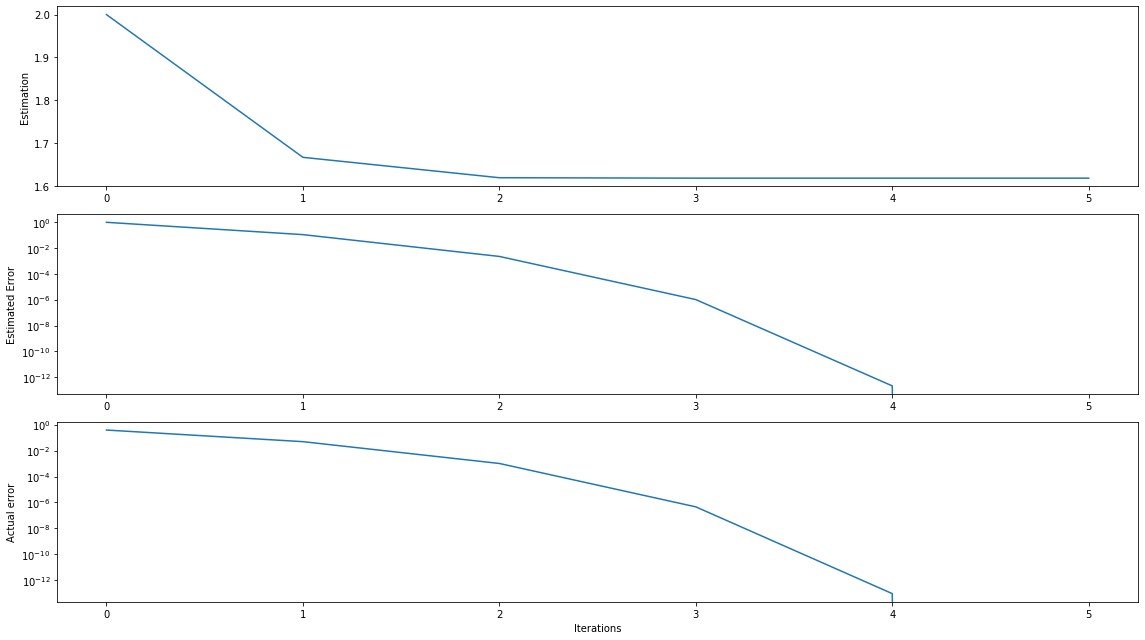

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
ax1, ax2, ax3 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')  

# Plot the estimation error (log(error)) in history
ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')   
ax2.set_yscale('log')      

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax3.plot(iterations, actual_error)
ax3.set_ylabel('Actual error')
ax3.set_yscale('log')
ax3.set_xlabel('Iterations')  

plt.tight_layout()
plt.show()

#converge quadratically

## 3. Secant Method

### Algorithm

Let $a = x_0$ and $b = x_1$.
<br><br>
Let $f(x)$ be a continuous function on a closed interval $[a, b]$ such that $f(a)f(b) < 0$.
<br><br>
Consider two points $(a, f(a))$ and $(b, f(b))$. So the secant line connecting these two points is
    $$y_0 = \frac{f(b) - f(a)}{b - a}(x - a) + f(a).$$
Then the point cross $x$-axis is
    $$0 = \frac{f(b) - f(a)}{b - a}(x - a) + f(a);$$
therefore,
    $$x = a - f(a) \frac{b - a}{f(b) - f(a)} = a_{\text{next}}.$$
For convenience, we define
    $$\Delta x = - f(a) \frac{b - a}{f(b) - f(a)},$$
so
    $$x = a + \Delta x.$$

### Implementation

In [9]:
def secant(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    interval: list
        The initial interval to search
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'
    
    num_iterations = 0
    a_next, b_next = a, b

    if report_history:
        history = {'estimation': [], 'x_error': [], 'y_error': []}
    
    while True:
        d_x = -func(a_next)*(b_next-a_next)/(func(b_next)-func(a_next))  
        c =  a_next + d_x
        x_error = abs(d_x)        
        y_error = abs(func(c))    

        if report_history:
            history['estimation'].append(c)
            history['x_error'].append(x_error)
            history['y_error'].append(y_error)

        if x_error < tolerance or y_error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return (c, history) if report_history else c
        
        if num_iterations < max_iterations:  
            
            num_iterations += 1
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            
            else:
                return (c, history) if report_history else c
        
        else:
            print('Terminate since reached the maximum iterations.')
            return c, history if report_history else c



### Example

In [10]:
my_initial_interval = [1.0, 2.0]                  # Maybe [1.0, 2.0] is a good choice

solution, history = secant(
    f, 
    my_initial_interval,
    max_iterations=100,
    tolerance=1e-7,
    report_history=True
)
print(solution)

Found solution after 8 iterations.
1.6180339631667067


### Error Analysis

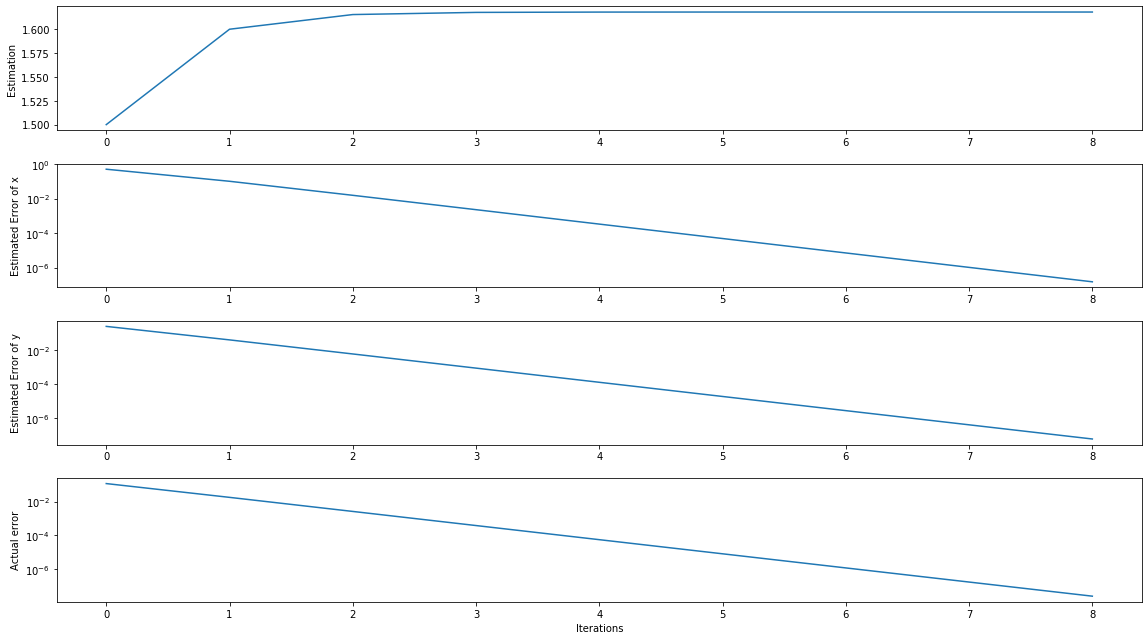

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error of x (log(error of x)) in history
ax2.plot(iterations, history['x_error'])
ax2.set_ylabel('Estimated Error of x')
ax2.set_yscale('log')

# Plot the estimation error of y (log(error of y)) in history
ax3.plot(iterations, history['y_error'])
ax3.set_ylabel('Estimated Error of y')
ax3.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax4.plot(iterations, actual_error)
ax4.set_ylabel('Actual error')
ax4.set_yscale('log')
ax4.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

#converge superlinearly

## 4. Fixed Point Method

### Algorithm
The root-finding problem $f(x) = 0$ can be always be transformed into another form, $g(x) = x$, known as the **fixed point problem**.<br><br>
Given $f$, one such transformation is to define $g(x) = x - f(x)$.<br><br>
If we try to solve the intersection of these two lines $g(x) = x - f(x)$ and $y = x$, then we will have
    $$x - f(x) = x \,\Rightarrow\, f(x) = 0;$$
<br>therefore, the intersection point will be the same as the solution of $f(x) = 0$.<br>

### Implementation

In [12]:
def fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    x_n = x_0
    num_iterations = 0
    if report_history:
        history = {'estimation': [], 'error': []}
        
    while True:
        f_of_x_n = func(x_n)
        error = abs(f_of_x_n - x_n)  
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        if error < tolerance:  
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
        if num_iterations < max_iterations:
            num_iterations += 1
            x_n = f_of_x_n
        
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
    

### Example
Let $f_1(x) = x^2 - 4x + 3.5$.<br><br>
If we want to solve $f_1(x) = 0$, then we will define the function $g$ as
    $$g(x) = x - f_1(x).$$
<br>So the intersection of two lines $g(x)$ and $y = x$ will be the solution of $f_1(x) = 0$.<br>

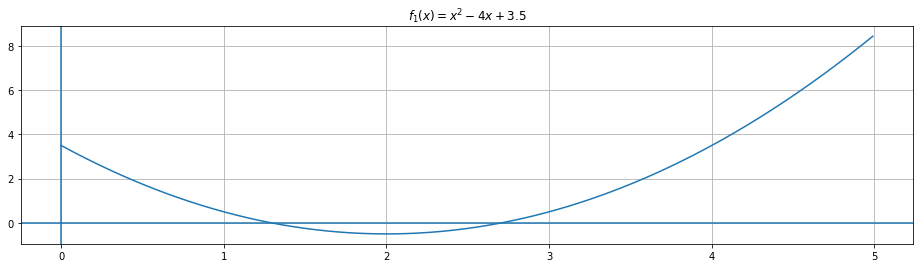

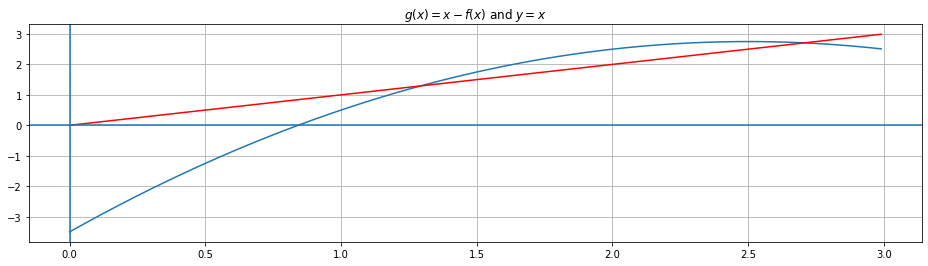

In [13]:
def f1(x):
    return x**2 - 4*x + 3.5

def g(x):
    return x - f1(x)

fig, ax = plt.subplots(figsize=(16, 4))
search_range = np.arange(0, 5, 0.01)
ax.plot(search_range, f1(search_range))
ax.set_title(r'$f_1(x) = x^2 - 4x + 3.5$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

fig, ax = plt.subplots(figsize=(16, 4))
search_range = np.arange(0, 3, 0.01)
ax.plot(search_range, g(search_range))
ax.plot(search_range, search_range, color = 'r')
ax.set_title(r'$g(x) = x - f(x)$ and $y = x$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

In [14]:
my_initial_point = 2.5                  # You can choose the point in [0.5, 2.5]

solution, history = fixed_point(
    g,   #注意：這裡是g!
    my_initial_point,
    tolerance=1e-7,
    max_iterations=100,
    report_history=True
)
print(solution)

Found solution after 17 iterations.
2.707106815487192


### Error Analysis

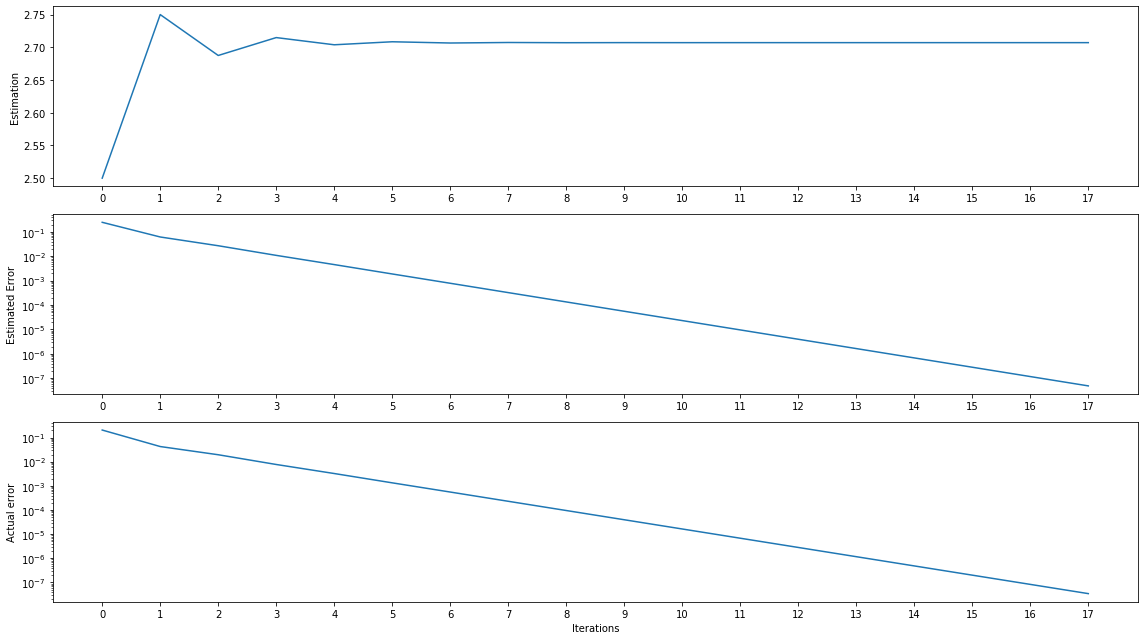

In [15]:
error = np.inf
for root in np.roots([1, -4, 3.5]):
    if abs(root - solution) < error:
        exact_solution = root
        error = abs(root - solution)
        
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
ax1, ax2, ax3 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error (log(error)) in history
ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax3.plot(iterations, actual_error)
ax3.set_ylabel('Actual error')
ax3.set_yscale('log')
ax3.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

## 5. Aitken Method

### Algorithm
The convergence of the sequence $\{x_n\}$ can be accelerated by Aitken's  $\Delta^2$ method.

#### $$K = \frac{x_{n+2} -\alpha}{x_{n+1}-\alpha} = \frac{x_{n+1}-\alpha}{x_n-\alpha} \implies \alpha = \frac{x_{n+2}x_n - x_{n+1}^2}{x_{n+2}-2x_{n+1}+x_n} = x_n - \frac{(\Delta x_n)^2}{\Delta^2 x_n} \left(= x_{n+2} - \frac{(\Delta x_{n+1})^2}{\Delta^2 x_n}\right),$$ where $$\Delta x_n \triangleq x_{n+1}-x_{n}, \Delta^2 x_n = \Delta(x_{n+1}-x_n)=\Delta x_{n+1} - \Delta x_n = x_{n+2} - 2 x_{n+1} + x_n.$$

#### In practice, we use $$\alpha = x_n - \frac{(\Delta x_n)^2}{\Delta^2 x_n} = x_{n+2} - \frac{(\Delta x_{n+1})^2}{\Delta^2 x_n} = x_{n+2} - \frac{(x_{n+2}-x_{n-1})^2}{(x_{n+2}-x_{n+1})-(x_{n+1}-x_n)}\text{, where } x_{n+1} = f(x_n), x_{n+2} = f(x_{n+1}).$$

### Implementation

In [16]:
def accelerated_fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
):
    '''Find the fixed point of the given function func

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution f(x)=x.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process
        history: {'x_n': list}
    '''

    x_n = x_0
    num_iterations = 0
    history = {'x_n': []}
        
    while True:
        x_1 = func(x_0)
        x_2 = func(x_1) 
        x_n = x_2 - (x_2 - x_1)**2/(x_2-2*x_1+x_0)
        
        error = abs(x_n - x_0)  
        num_iterations += 1
        history['x_n'].append(x_n)
        
        if error < tolerance:  
            print('Found solution after', num_iterations,'iterations.')
            return x_n, history

        if num_iterations < max_iterations: 
            x_0 = x_n
        
        else:
            print('Terminate since reached the maximum iterations.')
            return x_n, history

### Example

In [17]:
def f2(x):
    return np.cos(x)

solution, history = accelerated_fixed_point(
    # ===== 請實做程式 =====
    func=f2,
    x_0=1.0,
    tolerance=1e-10,
    max_iterations=100,
    # ====================
)

Found solution after 4 iterations.
